# Uber Trips Analysis

In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We chose the data of June 2014. 

In [2]:
# reading the data
df = pd.read_csv("./data/uber-raw-data-jun14.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


In [3]:
# inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663844 entries, 0 to 663843
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  663844 non-null  object 
 1   Lat        663844 non-null  float64
 2   Lon        663844 non-null  float64
 3   Base       663844 non-null  object 
dtypes: float64(2), object(2)
memory usage: 20.3+ MB


In [4]:
# checking for null values
df.isnull().mean()

Date/Time    0.0
Lat          0.0
Lon          0.0
Base         0.0
dtype: float64

In [5]:
# change the Date/Time column from 'object' to 'datetime'
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [6]:
# check the newly created column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663844 entries, 0 to 663843
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  663844 non-null  datetime64[ns]
 1   Lat        663844 non-null  float64       
 2   Lon        663844 non-null  float64       
 3   Base       663844 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 20.3+ MB


## Possible Insights
- Highest Number of Uber Pickups by the hour, month
- Highest number of pickups based on base
- TLC with the highest number of pickups
- graph with average pickups over the week days
- heatmap of hours/ weekdays and frequency of pickups

### Dividing Data into bins of DateTime

In [7]:
# using the dt.floor() to create bins of interval 15mins and create a new column
df['BinnedHour'] = df['Date/Time'].dt.floor('15min')

In [8]:
df['BinnedHour']

0        2014-06-01 00:00:00
1        2014-06-01 00:00:00
2        2014-06-01 00:00:00
3        2014-06-01 00:00:00
4        2014-06-01 00:00:00
                 ...        
663839   2014-06-30 22:30:00
663840   2014-06-30 23:00:00
663841   2014-06-30 23:00:00
663842   2014-06-30 23:15:00
663843   2014-06-30 23:30:00
Name: BinnedHour, Length: 663844, dtype: datetime64[ns]

### Creating Separate Columns for WeekDay, Date and Time

In [11]:
DayMap = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thurday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['Day'] = df['BinnedHour'].dt.weekday.map(DayMap)
df['Date'] = df['BinnedHour'].dt.date
df['Time'] = df['BinnedHour'].dt.time

df.head()

,Date/Time,Lat,Lon,Base,BinnedHour,Day,Date,Time
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512,2014-06-01,Sunday,2014-06-01,00:00:00
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512,2014-06-01,Sunday,2014-06-01,00:00:00
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512,2014-06-01,Sunday,2014-06-01,00:00:00
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512,2014-06-01,Sunday,2014-06-01,00:00:00
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512,2014-06-01,Sunday,2014-06-01,00:00:00


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [19]:
df.groupby(df['Date'])['BinnedHour'].count().sort_values(ascending=False).head(1)

Date
2014-06-13    31207
Name: BinnedHour, dtype: int64

Ans: Highest Number of Pickups happened on 13th June 2014

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [20]:
df.groupby(df['Date'])['BinnedHour'].count().sort_values(ascending=False)[0]

31207

Ans: 31207

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [22]:
df['Base'].nunique()

5

Ans: There are 5 Unique Companies affiliated with the Uber Pickups

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [45]:
df.groupby(df['Base']).count()['BinnedHour'].reset_index().max()

Base          B02764
BinnedHour    242975
dtype: object

Ans: B02764 has the highest number of pickups

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [51]:
tlc_count = df.groupby(df['Base']).count()['Time'].reset_index()
tlc_count.rename(columns={'Time': 'Count'}, inplace=True)
tlc_count

,Base,Count
0,B02512,32509
1,B02598,242975
2,B02617,184460
3,B02682,194926
4,B02764,8974


Ans: {B02512: 32509, B02598: 242975, B02617: 184460, B02682: 194926, B02764: 8974}

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [58]:
df['Hour'] = df['Date/Time'].dt.hour

pickup_count_hour = df.groupby(df['Hour']).count()['BinnedHour']
pickup_count_hour.sort_values(ascending=False).head(1)

Hour
17    50452
Name: BinnedHour, dtype: int64

Ans: Higest Number of Pickups occured between 4pm and 5pm

#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function

Text(0, 0.5, 'Number of Rides')

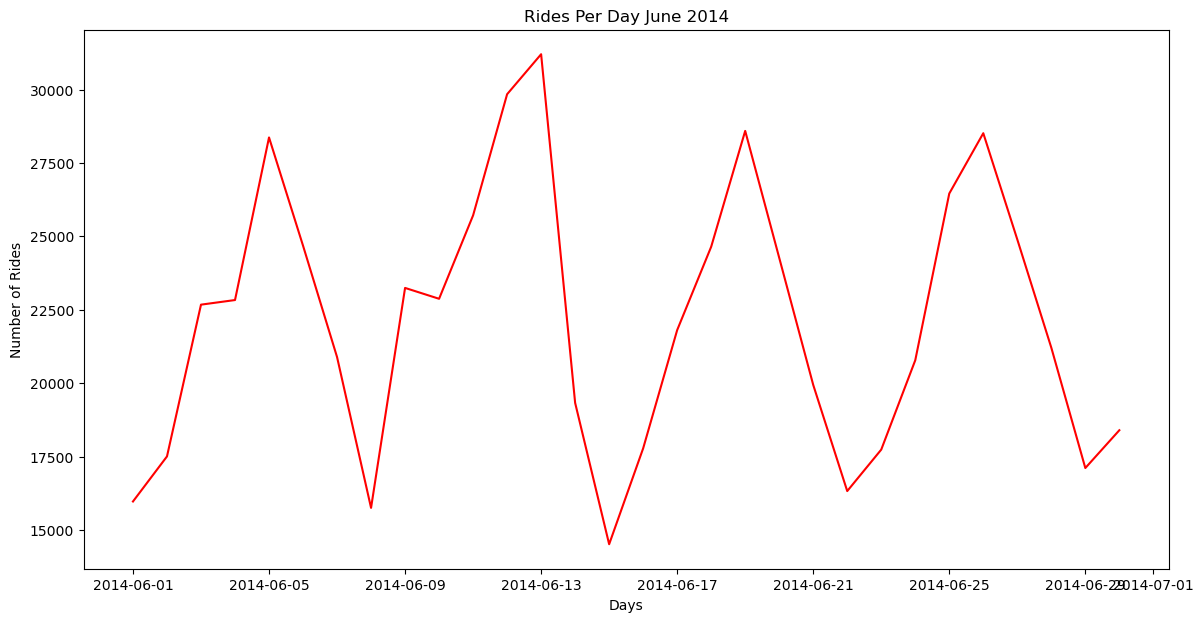

In [109]:
# visualise the Frequency of Rides over the month
plt.figure(figsize=(14, 7))
df['Date'].value_counts().sort_index().plot(kind='line', color='red')
plt.title("Rides Per Day June 2014")
plt.xlabel('Days')
plt.ylabel('Number of Rides')

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

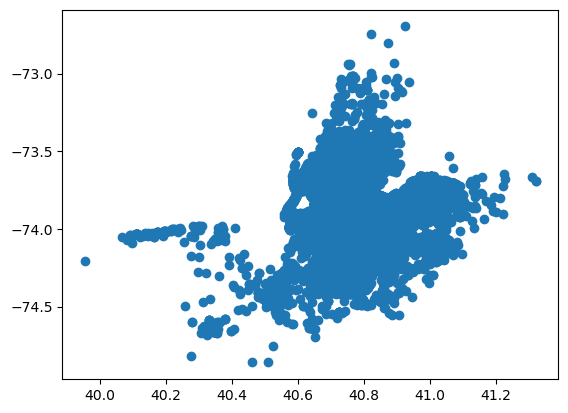

In [72]:
plt.scatter(x=df['Lat'], y=df['Lon'])

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Text(0, 0.5, 'No of PickUps')

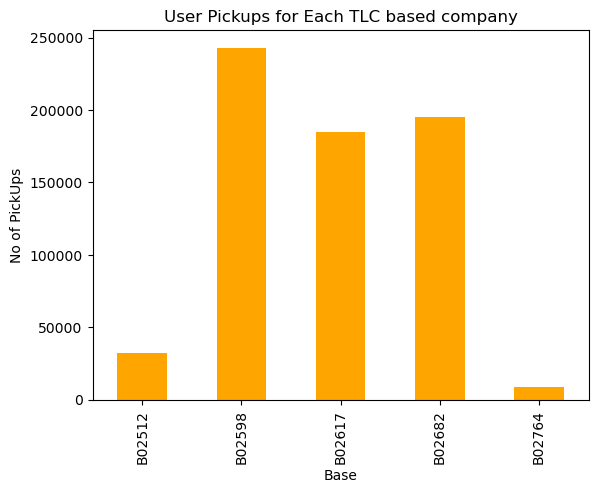

In [70]:
df.groupby(df['Base']).count()['BinnedHour'].plot(kind='bar', color='orange')
plt.title("User Pickups for Each TLC based company")
plt.xlabel('Base')
plt.ylabel('No of PickUps')

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

In [103]:
weekday_count = df.groupby(df['Day']).count()['BinnedHour'].sort_values(ascending=False).reset_index()
weekday_count.rename(columns={"BinnedHour": 'Count'}, inplace=True)
weekday_count

,Day,Count
0,Thurday,115325
1,Friday,105056
2,Wednesday,99654
3,Monday,94655
4,Tuesday,88134
5,Saturday,81364
6,Sunday,79656


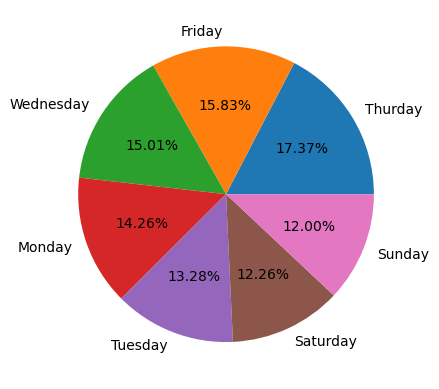

In [108]:
my_labels = weekday_count['Day']
plt.pie(weekday_count['Count'].to_list(), labels=my_labels, autopct='%0.2f%%')
plt.show()